In [1]:
import pandas as pd 
dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

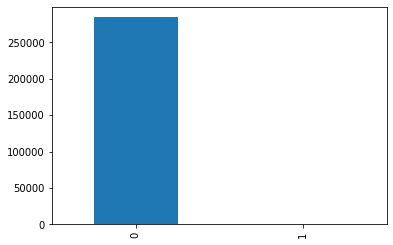

In [5]:
pd.value_counts(dataset['Class']).plot.bar()

Step1 -We Will Create an ANN and solve this problem(ROC AUC) 

Step2- We will use some Weights handling techniques to solve this imbalanced then we create the ANN

In [6]:
X=dataset.iloc[:,1:30]
y=dataset.iloc[:,-1]

In [7]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.30, random_state= 42)

In [10]:
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [11]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
# defining the model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=29, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0389
Epoch 2/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0202
Epoch 3/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0079
Epoch 4/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0135
Epoch 5/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0121
Epoch 6/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0084
Epoch 7/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0095
Epoch 8/10
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0084
Epoch 9/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0072
Epoch 10/10
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0078


In [14]:
from sklearn.metrics import roc_auc_score
y_pred= model.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.9354974145284264


Weighted Neural Network With Keras

Define Weights

Fit the model with those specific weights

In [15]:
weights_assigned={0:1,1:550}

In [16]:

# defining the model again with weights
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=29, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 13s 2ms/step - loss: 5.2709
Epoch 2/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.2670
Epoch 3/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.2988
Epoch 4/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.1657
Epoch 5/10
6231/6231 [==============================] - 12s 2ms/step - loss: 3.3689
Epoch 6/10
6231/6231 [==============================] - 12s 2ms/step - loss: 5.4217
Epoch 7/10
6231/6231 [==============================] - 12s 2ms/step - loss: 1.5370
Epoch 8/10
6231/6231 [==============================] - 12s 2ms/step - loss: 2.0116
Epoch 9/10
6231/6231 [==============================] - 12s 2ms/step - loss: 1.4465
Epoch 10/10
6231/6231 [==============================] - 12s 2ms/step - loss: 1.2932


In [17]:
from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)
print(roc_auc_score(y_test, y_pred1))

0.9844785942674865
